In [1]:
#!/usr/bin/python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import Pre_Processing

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

import scipy.io as sio
import os

from imblearn.over_sampling import SMOTE

In [2]:
#os.system('python Pre_Processing.py')

In [3]:
"""
    Load Mat files, remove some variables, 
    added file name to add label and 
    then create single directory by appending all files taking label and spcImage variables
"""
dataDir = "New_2ndDerivative_MatFiles/"
data = {}
label_xls=pd.ExcelFile("filenames_refTab1.xlsx") #read excel file for Label
label_xls = label_xls.parse('Sheet1')

for file in os.listdir( dataDir ) :
    if file.endswith('.mat'):
        print(dataDir+file)
        loaddata=sio.loadmat(dataDir+file)
        del loaddata['pizelSize'] #delete variables
        del loaddata['wavenumbers']
        del loaddata['__globals__']
        del loaddata['__header__']
        del loaddata['__version__']
        del loaddata['imageSize']
        loaddata["filename_MAT"]=[file]
        loaddata['Label']=[label_xls.loc[label_xls['filename_MAT'] == file , 'Label'].item()]
        del loaddata["filename_MAT"]
        
        for k, v in loaddata.items(): #append all files data
            data.setdefault(k, []).append(v)
        


New_2ndDerivative_MatFiles/Pat010_02.mat
New_2ndDerivative_MatFiles/Pat002_02.mat
New_2ndDerivative_MatFiles/Pat049_02.mat
New_2ndDerivative_MatFiles/Pat045_02.mat
New_2ndDerivative_MatFiles/Pat038_02.mat
New_2ndDerivative_MatFiles/Pat010_01.mat
New_2ndDerivative_MatFiles/Pat002_01.mat
New_2ndDerivative_MatFiles/Pat049_01.mat
New_2ndDerivative_MatFiles/Pat034_01.mat
New_2ndDerivative_MatFiles/Pat045_01.mat
New_2ndDerivative_MatFiles/Pat038_01.mat
New_2ndDerivative_MatFiles/Pat012_01.mat
New_2ndDerivative_MatFiles/Pat047_01.mat
New_2ndDerivative_MatFiles/Pat024_01.mat
New_2ndDerivative_MatFiles/Pat055_01.mat
New_2ndDerivative_MatFiles/Pat028_01.mat
New_2ndDerivative_MatFiles/Pat036_01.mat
New_2ndDerivative_MatFiles/Pat047_02.mat
New_2ndDerivative_MatFiles/Pat036_02.mat
New_2ndDerivative_MatFiles/Pat051_01.mat
New_2ndDerivative_MatFiles/Pat032_01.mat
New_2ndDerivative_MatFiles/Pat043_01.mat
New_2ndDerivative_MatFiles/Pat020_01.mat
New_2ndDerivative_MatFiles/Pat008_01.mat
New_2ndDerivativ

In [4]:
for n, i in enumerate(data['Label']):
    if i == ['O']:
        data['Label'][n] = ['PM']
    elif i == ['LGD']:
        data['Label'][n] = ['PM']
    elif i == ['HGD']:
        data['Label'][n] = ['PM']
    elif i == ['BO']:
        data['Label'][n] = ['PM']
    elif i == ['BN']:
        data['Label'][n] = ['PM']

In [5]:
"""Transpose array axes"""
X_data, y_data = np.array(data['spcImage']).transpose((0,1,2,3)), np.array(data['Label'])[:,0]
print(X_data.shape,y_data.shape)

(83, 140, 140, 389) (83,)


In [6]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (140, 140, 389):
            ax.imshow(img[i,:,:,0])
        else:
            ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])       
        

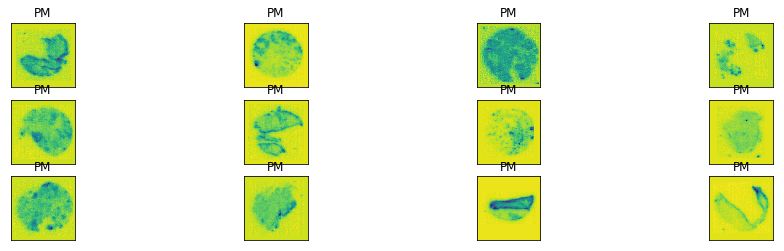

In [7]:
plot_images(X_data,y_data,3,4)

In [8]:
from sklearn import preprocessing

# integer encode
le = preprocessing.LabelEncoder()
y_data = le.fit_transform(y_data)
print(y_data)


# binary encode
enc = preprocessing.OneHotEncoder().fit(y_data.reshape(-1, 1))
y_data = enc.transform(y_data.reshape(-1, 1)).toarray()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2
 0 2 2 0 0 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 2 0 2 0 2 1 0 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 1 2]


In [9]:
"""Splitting data into train and test by stratified sampling in 80:20"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    stratify=y_data,test_size=0.20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    stratify=y_train,test_size=0.10)



In [10]:
import h5py

# Create file
h5f = h5py.File('patient_2Deravitive.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=X_train)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=X_test)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=X_val)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()